# Analyse des données Loto Normal

Ce notebook permet d'analyser les tirages historiques du Loto à partir du fichier consolidé `loto_normal_all_clean.csv`.

## Objectifs
- Explorer la structure des données (1976-2026)
- Identifier les numéros les plus fréquents
- Analyser les tendances temporelles
- Visualiser les distributions
- Générer des suggestions de tirages

### 📝 Note sur les données

Les données proviennent de 5 fichiers sources fusionnés et nettoyés :
- **nouveau_loto.csv** (1317 tirages)
- **loto_201911.csv** (980 tirages)  
- **loto_201902.csv** (107 tirages)
- **loto2017.csv** (310 tirages)
- **loto.csv** (4858 tirages)

**Total : 7572 tirages de 1976 à 2026 (50 ans d'historique !)**

**Améliorations appliquées** :
- ✓ Suppression des colonnes vides
- ✓ Dates standardisées (YYYY-MM-DD)
- ✓ Nombres uniformisés (format décimal cohérent)
- ✓ Tri chronologique
- ✓ Types de données optimisés

## 1. Import des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import random

# Configuration pour de meilleurs graphiques
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("Bibliothèques importées avec succès !")

Bibliothèques importées avec succès !


## 2. Chargement des données

In [2]:
# Charger le fichier CSV nettoyé
df = pd.read_csv('data/loto_normal_all_clean.csv', sep=';', low_memory=False)

print(f"Nombre de tirages : {len(df)}")
print(f"Nombre de colonnes : {len(df.columns)}")
print(f"Période couverte : {df['date_de_tirage'].min()} à {df['date_de_tirage'].max()}")
print(f"\n50 ANS D'HISTORIQUE DU LOTO FRANÇAIS ! 🎉")
print(f"\nPremières lignes du dataset :")
df.head()

Nombre de tirages : 7572
Nombre de colonnes : 53
Période couverte : 1976-05-19 à 2026-02-07

50 ANS D'HISTORIQUE DU LOTO FRANÇAIS ! 🎉

Premières lignes du dataset :


,annee_numero_de_tirage,jour_de_tirage,date_de_tirage,date_de_forclusion,boule_1,boule_2,boule_3,boule_4,boule_5,numero_chance,...,nombre_de_gagnant_au_rang_2_second_tirage,rapport_du_rang2_second_tirage,nombre_de_gagnant_au_rang_3_second_tirage,rapport_du_rang3_second_tirage,nombre_de_gagnant_au_rang_4_second_tirage,rapport_du_rang4_second_tirage,1er_ou_2eme_tirage,boule_6,boule_complementaire,numero_joker
0,1976001,ME,1976-05-19,NaN,31,15,33,27,36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,48.0,34.0,NaN
1,1976002,JE,1976-06-03,NaN,10,26,42,1,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,14.0,31.0,NaN
2,1976003,JE,1976-06-10,NaN,44,16,47,10,15,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,27.0,NaN
3,1976004,ME,1976-06-16,NaN,2,3,35,13,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,28.0,49.0,NaN
4,1976005,ME,1976-06-23,NaN,30,22,11,9,23,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,47.0,49.0,NaN


## 3. Exploration de la structure

In [3]:
# Informations sur les colonnes
print("Colonnes principales :")
main_cols = ['annee_numero_de_tirage', 'date_de_tirage', 'boule_1', 'boule_2', 
             'boule_3', 'boule_4', 'boule_5', 'boule_6', 'numero_chance']
for col in main_cols:
    if col in df.columns:
        print(f"  - {col}")
        
print(f"\nTotal de colonnes : {len(df.columns)}")

Colonnes principales :
  - annee_numero_de_tirage
  - date_de_tirage
  - boule_1
  - boule_2
  - boule_3
  - boule_4
  - boule_5
  - boule_6
  - numero_chance

Total de colonnes : 53


## 4. Analyse des numéros tirés

Analysons les 5 boules principales du loto (numéros de 1 à 49).

In [4]:
# Collecter tous les numéros des 5 boules principales
all_numbers = []

for col in ['boule_1', 'boule_2', 'boule_3', 'boule_4', 'boule_5']:
    if col in df.columns:
        numbers = df[col].dropna()
        all_numbers.extend(numbers.astype(int).tolist())

# Compter les occurrences
number_counts = Counter(all_numbers)
most_common = number_counts.most_common(10)

print(f"ANALYSE SUR {len(all_numbers)} BOULES TIRÉES !")
print(f"\nLes 10 numéros les plus fréquents :")
for num, count in most_common:
    freq = (count / len(all_numbers)) * 100
    print(f"Numéro {num:2d} : {count:4d} fois ({freq:.2f}%)")

ANALYSE SUR 37860 BOULES TIRÉES !

Les 10 numéros les plus fréquents :
Numéro 13 :  817 fois (2.16%)
Numéro 34 :  816 fois (2.16%)
Numéro 16 :  815 fois (2.15%)
Numéro 36 :  814 fois (2.15%)
Numéro 49 :  812 fois (2.14%)
Numéro 38 :  806 fois (2.13%)
Numéro 15 :  805 fois (2.13%)
Numéro  7 :  799 fois (2.11%)
Numéro 20 :  799 fois (2.11%)
Numéro 27 :  797 fois (2.11%)


## 5. Visualisation des fréquences

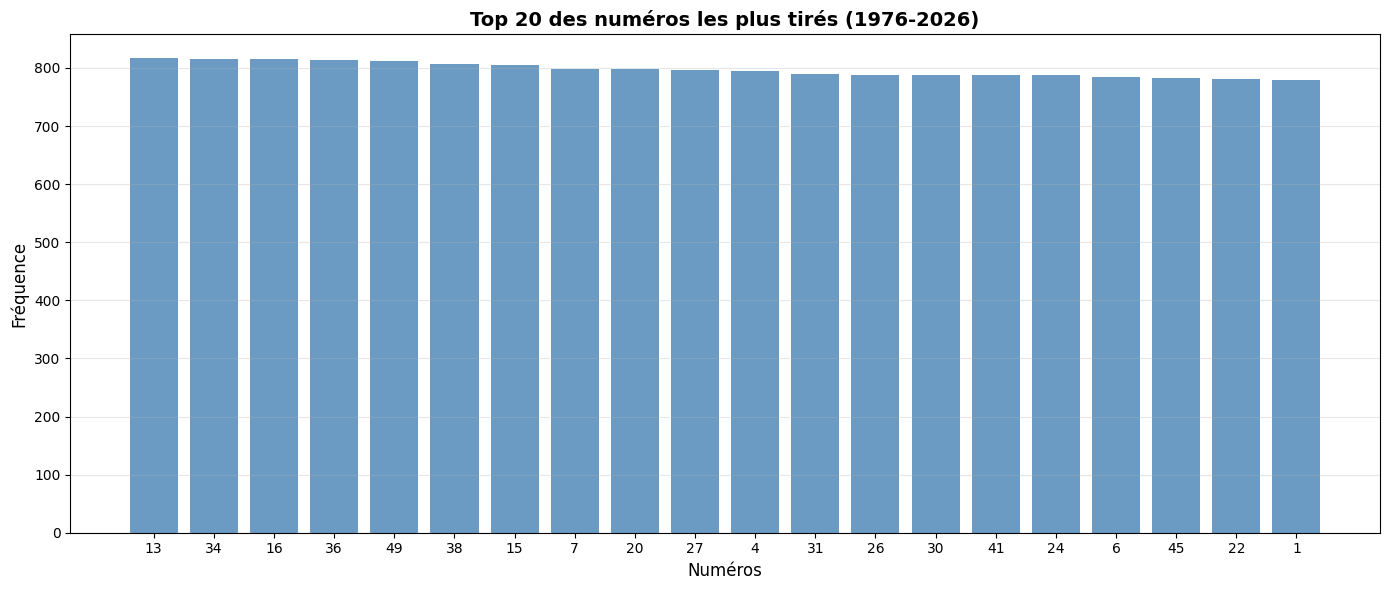

Moyenne attendue pour chaque numéro : 773 fois


In [5]:
# Graphique des 20 numéros les plus fréquents
top_20 = number_counts.most_common(20)
numbers, counts = zip(*top_20)

plt.figure(figsize=(14, 6))
plt.bar(range(len(numbers)), counts, color='steelblue', alpha=0.8)
plt.xlabel('Numéros', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Top 20 des numéros les plus tirés (1976-2026)', fontsize=14, fontweight='bold')
plt.xticks(range(len(numbers)), numbers)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Moyenne attendue pour chaque numéro : {len(all_numbers) / 49:.0f} fois")

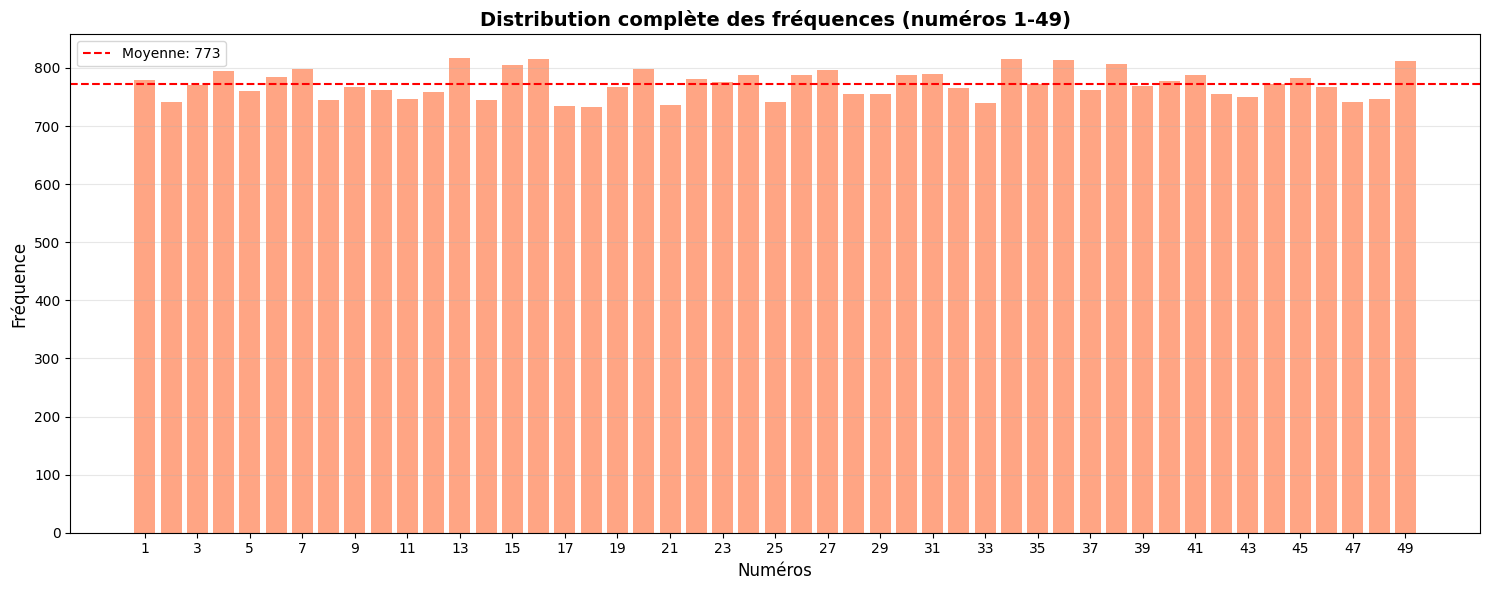

In [6]:
# Distribution complète de tous les numéros (1 à 49)
all_numbers_freq = [number_counts.get(i, 0) for i in range(1, 50)]

plt.figure(figsize=(15, 6))
plt.bar(range(1, 50), all_numbers_freq, color='coral', alpha=0.7)
plt.axhline(y=np.mean(all_numbers_freq), color='red', linestyle='--', 
            label=f'Moyenne: {np.mean(all_numbers_freq):.0f}')
plt.xlabel('Numéros', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.title('Distribution complète des fréquences (numéros 1-49)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.xticks(range(1, 50, 2))
plt.tight_layout()
plt.show()

## 6. Analyse du numéro chance

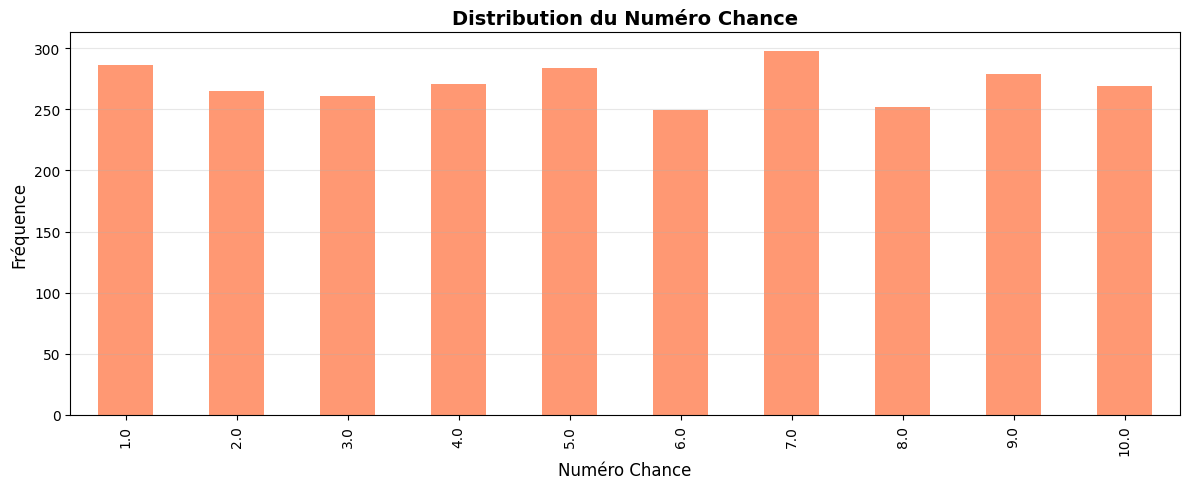

Numéro chance le plus fréquent : 7.0 (298 fois)
Total de tirages avec numéro chance : 2714


In [7]:
# Analyser le numéro chance
if 'numero_chance' in df.columns:
    chance_numbers = df['numero_chance'].dropna()
    
    if len(chance_numbers) > 0:
        chance_counts = chance_numbers.value_counts().sort_index()
        
        plt.figure(figsize=(12, 5))
        chance_counts.plot(kind='bar', color='coral', alpha=0.8)
        plt.xlabel('Numéro Chance', fontsize=12)
        plt.ylabel('Fréquence', fontsize=12)
        plt.title('Distribution du Numéro Chance', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"Numéro chance le plus fréquent : {chance_counts.idxmax()} ({chance_counts.max()} fois)")
        print(f"Total de tirages avec numéro chance : {len(chance_numbers)}")
    else:
        print("Pas de données pour le numéro chance")
else:
    print("Colonne 'numero_chance' non trouvée")

## 7. Statistiques descriptives

In [8]:
# Calculer les statistiques sur les numéros tirés
stats_df = pd.DataFrame({
    'Moyenne': np.mean(all_numbers),
    'Médiane': np.median(all_numbers),
    'Écart-type': np.std(all_numbers),
    'Min': np.min(all_numbers),
    'Max': np.max(all_numbers),
    'Total tirages': len(all_numbers),
    'Numéros distincts': len(set(all_numbers))
}, index=['Statistiques'])

print("Statistiques globales sur 50 ans de loto :")
print(f"La distribution est {'équilibrée' if np.std(all_numbers_freq) < 50 else 'variable'}")
stats_df.T

Statistiques globales sur 50 ans de loto :
La distribution est équilibrée


,Statistiques
Moyenne,25.022795
Médiane,25.000000
Écart-type,14.131388
Min,1.000000
Max,49.000000
Total tirages,37860.000000
Numéros distincts,49.000000


## 8. Génération de suggestions de tirage

⚠️ **DISCLAIMER IMPORTANT** : Le loto est un jeu de hasard pur. Chaque tirage est indépendant et tous les numéros ont exactement la même probabilité d'être tirés (1/49). Les fréquences passées n'influencent pas les tirages futurs.

Les suggestions ci-dessous sont basées sur différentes **stratégies statistiques** sur 50 ans de données à titre illustratif uniquement.

In [9]:
# Stratégie 1 : Numéros "chauds" (les plus fréquents sur 50 ans)
print("🔥 STRATÉGIE 1 : Numéros les plus fréquents sur 50 ans (\"chauds\")")
print("="*60)
hot_numbers = [num for num, count in number_counts.most_common(15)]
tirage_hot = sorted(random.sample(hot_numbers, 5))
print(f"Boules principales : {tirage_hot}")

# Pour le numéro chance
if 'numero_chance' in df.columns and len(chance_counts) > 0:
    chance_hot = chance_counts.idxmax()
    print(f"Numéro chance : {chance_hot}")
    print(f"Tirage complet : {tirage_hot} + {chance_hot}")
else:
    print(f"Tirage complet : {tirage_hot}")

print(f"\n📊 Ces numéros sont apparus le plus souvent depuis 1976")
print(f"   Top 15 numéros : {hot_numbers[:15]}")

🔥 STRATÉGIE 1 : Numéros les plus fréquents sur 50 ans ("chauds")
Boules principales : [13, 16, 27, 31, 41]
Numéro chance : 7.0
Tirage complet : [13, 16, 27, 31, 41] + 7.0

📊 Ces numéros sont apparus le plus souvent depuis 1976
   Top 15 numéros : [13, 34, 16, 36, 49, 38, 15, 7, 20, 27, 4, 31, 26, 30, 41]


In [10]:
# Stratégie 2 : Distribution équilibrée
print("\n⚖️ STRATÉGIE 2 : Distribution équilibrée")
print("="*60)

zones = {
    'bas': list(range(1, 13)),
    'moyen_bas': list(range(13, 25)),
    'moyen_haut': list(range(25, 37)),
    'haut': list(range(38, 50))
}

tirage_equilibre = []
for zone_name, zone_nums in list(zones.items())[:4]:
    tirage_equilibre.append(random.choice(zone_nums))

tirage_equilibre.append(random.randint(1, 49))
tirage_equilibre = sorted(list(set(tirage_equilibre))[:5])

while len(tirage_equilibre) < 5:
    num = random.randint(1, 49)
    if num not in tirage_equilibre:
        tirage_equilibre.append(num)

tirage_equilibre = sorted(tirage_equilibre)
print(f"Boules principales : {tirage_equilibre}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    chance_eq = random.choice(chance_counts.nlargest(5).index.tolist())
    print(f"Numéro chance : {chance_eq}")
    print(f"Tirage complet : {tirage_equilibre} + {chance_eq}")
else:
    print(f"Tirage complet : {tirage_equilibre}")

print(f"\n📊 Mélange de numéros bas, moyens et hauts")


⚖️ STRATÉGIE 2 : Distribution équilibrée
Boules principales : [4, 22, 35, 38, 47]
Numéro chance : 9.0
Tirage complet : [4, 22, 35, 38, 47] + 9.0

📊 Mélange de numéros bas, moyens et hauts


In [11]:
# Stratégie 3 : Pondération par fréquence historique (50 ans)
print("\n🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique")
print("="*60)

weighted_pool = []
for num in range(1, 50):
    freq = number_counts.get(num, 1)
    weighted_pool.extend([num] * freq)

tirage_pondere = []
temp_pool = weighted_pool.copy()
while len(tirage_pondere) < 5:
    num = random.choice(temp_pool)
    if num not in tirage_pondere:
        tirage_pondere.append(num)
    temp_pool = [n for n in temp_pool if n != num]

tirage_pondere = sorted(tirage_pondere)
print(f"Boules principales : {tirage_pondere}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    chance_weights = chance_counts.to_dict()
    chance_pool = []
    for num, freq in chance_weights.items():
        chance_pool.extend([num] * int(freq))
    chance_pondere = random.choice(chance_pool)
    print(f"Numéro chance : {chance_pondere}")
    print(f"Tirage complet : {tirage_pondere} + {chance_pondere}")
else:
    print(f"Tirage complet : {tirage_pondere}")

print(f"\n📊 Probabilité proportionnelle aux 50 ans d'historique")


🎲 STRATÉGIE 3 : Tirage pondéré par fréquence historique
Boules principales : [2, 17, 23, 35, 38]
Numéro chance : 6.0
Tirage complet : [2, 17, 23, 35, 38] + 6.0

📊 Probabilité proportionnelle aux 50 ans d'historique


In [12]:
# Stratégie 4 : Mix intelligent (recommandé)
print("\n✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)")
print("="*60)

top_frequent = [num for num, count in number_counts.most_common(20)]
tirage_mix = random.sample(top_frequent, 3)

medium_nums = [num for num in range(1, 50) if num not in top_frequent[:10]]
tirage_mix.extend(random.sample(medium_nums, 2))

tirage_mix = sorted(tirage_mix)
print(f"Boules principales : {tirage_mix}")

if 'numero_chance' in df.columns and len(chance_counts) > 0:
    top_chances = chance_counts.nlargest(5).index.tolist()
    chance_mix = random.choice(top_chances)
    print(f"Numéro chance : {chance_mix}")
    print(f"Tirage complet : {tirage_mix} + {chance_mix}")
else:
    print(f"Tirage complet : {tirage_mix}")

print(f"\n📊 Combine 50 ans de fréquences et variété statistique")


✨ STRATÉGIE 4 : Mix intelligent (RECOMMANDATION)
Boules principales : [4, 14, 16, 29, 49]
Numéro chance : 9.0
Tirage complet : [4, 14, 16, 29, 49] + 9.0

📊 Combine 50 ans de fréquences et variété statistique


### 🎯 Recommandation finale

La **Stratégie 4 (Mix intelligent)** est la plus équilibrée car elle combine :
- Des numéros statistiquement fréquents sur 50 ans (mais ce n'est pas une garantie)
- De la variété pour éviter les tirages trop prévisibles
- Un équilibre entre analyse historique et hasard

### ⚠️ Rappel essentiel

**Le loto reste un jeu de hasard pur** où :
- Chaque numéro a 1/49 chance d'être tiré (soit ~2,04%)
- Les tirages passés n'influencent pas les tirages futurs
- Aucune stratégie ne peut prédire les résultats
- La probabilité de gagner le rang 1 est d'environ 1 sur 19 millions

**Même avec 50 ans de données, aucune prédiction n'est possible !**

**Jouez de manière responsable** et considérez ces suggestions comme un simple exercice statistique sur un demi-siècle de loto français ! 🎲